### 使用Stocker类分析股票的基本示例。Stocker类建立在quandl财务库和fbprophet附加模型之上

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

#### 需要保证analysis和stocker.py在同一个文件夹

In [3]:
from stocker import Stocker

#### 对象是Python类的实例，要创建一个存储对象，使用有效的股票代码调用stocker类（约3000个），在这个过程中需要使用Microsoft

In [4]:
microsoft = Stocker('MSFT')

MSFT Stocker Initialized. Data covers 1986-03-13 00:00:00 to 2018-03-27 00:00:00.


#### stocker对象包含许多属性或数据片段以及作用于该数据的方法和函数。一个属性是股票历史的数据，我们可以把它分配给变量，然后查看数据

In [5]:
stock_history = microsoft.stock
stock_history.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,ds,y,Daily Change
0,1986-03-13,25.50,29.25,25.5,28.00,3582600.0,0.0,1.0,0.058941,0.067609,0.058941,0.064720,1.031789e+09,1986-03-13,0.064720,0.005779
1,1986-03-14,28.00,29.50,28.0,29.00,1070000.0,0.0,1.0,0.064720,0.068187,0.064720,0.067031,3.081600e+08,1986-03-14,0.067031,0.002311
2,1986-03-17,29.00,29.75,29.0,29.50,462400.0,0.0,1.0,0.067031,0.068765,0.067031,0.068187,1.331712e+08,1986-03-17,0.068187,0.001156
3,1986-03-18,29.50,29.75,28.5,28.75,235300.0,0.0,1.0,0.068187,0.068765,0.065876,0.066454,6.776640e+07,1986-03-18,0.066454,-0.001734
4,1986-03-19,28.75,29.00,28.0,28.25,166300.0,0.0,1.0,0.066454,0.067031,0.064720,0.065298,4.789440e+07,1986-03-19,0.065298,-0.001156


#### High是股票当天的最高价 Low是股票当天的最低价
#### Open是当天开始的价格 Close是闭市时间的股票价格
#### Volume是交易数量  Ex-Dividend除息  Split Ratio股票分割
#### Adjust Open开市价格；Adjust High人为调整最高；Adjust Low人为最低；Adjust Close根据法人行为调整之后的闭市价格；Adjust Volume人为交易数量

#### 类的优点是数据和作用于数据的函数与单个变量相关联。实际上，类是一种超级数据结构因为它包含其他数据和函数。

#### 股票历史数据的统计

In [7]:
microsoft.plot_stock()

('Adj. Close',
 96.77,
 Timestamp('2018-03-12 00:00:00'),
 0.060097123934714,
 Timestamp('1986-03-24 00:00:00'),
 89.47,
 Timestamp('2018-03-27 00:00:00'))

Maximum Daily Change = 4.44 on 2018-02-06 00:00:00.
Minimum Daily Change = -5.47 on 2018-03-27 00:00:00.
Current Daily Change = -5.47 on 2018-03-27 00:00:00.

Maximum Adj. Volume = 169163953.00 on 2015-01-27 00:00:00.
Minimum Adj. Volume = 7425503.00 on 2017-11-24 00:00:00.
Current Adj. Volume = 53704562.00 on 2018-03-27 00:00:00.



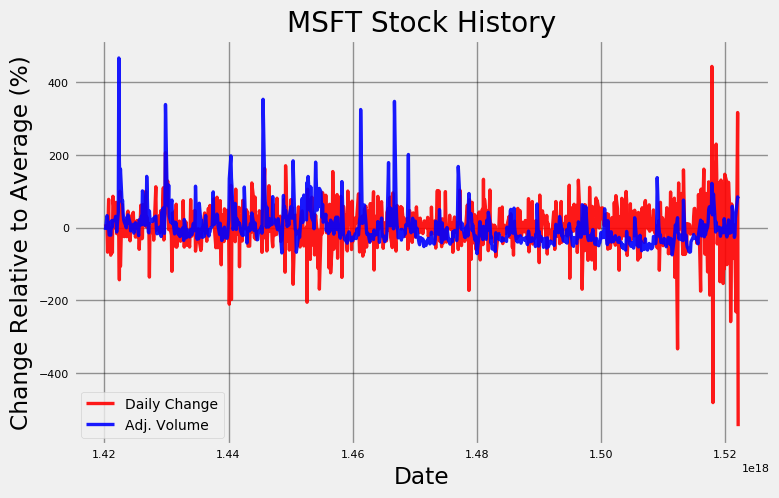

In [16]:
microsoft.plot_stock(start_date = '2000-01-03', end_date = '2018-01-16', 
                     stats = ['Daily Change', 'Adj. Volume'], plot_type='pct')

#### 假设有100美元股票的时候开始投资

In [28]:
microsoft.buy_and_hold(start_date='1986-03-13', end_date='2018-01-16', nshares=100)

MSFT Total buy and hold profit from 1986-03-13 00:00:00 to 2018-01-16 00:00:00 for 100 shares = $8829.11


TypeError: float() argument must be a string or a number, not 'Timestamp'

In [29]:
microsoft.buy_and_hold(start_date='1999-01-05', end_date='2002-01-03', nshares=100)

MSFT Total buy and hold profit from 1999-01-05 00:00:00 to 2002-01-03 00:00:00 for 100 shares = $-56.92


TypeError: float() argument must be a string or a number, not 'Timestamp'

#### 附加模型将时间序列表示为不同时间尺度（年度，月度，季节性）的总体趋势和模式。 虽然微软的整体方向是积极的，但它可能会在每个星期二减少，如果这是真的，我们可以利用我们在股票市场上的优势。

In [32]:
model, model_data = microsoft.create_prophet_model()

D:\Downloads\Anaconda\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


OverflowError: Python int too large to convert to C long

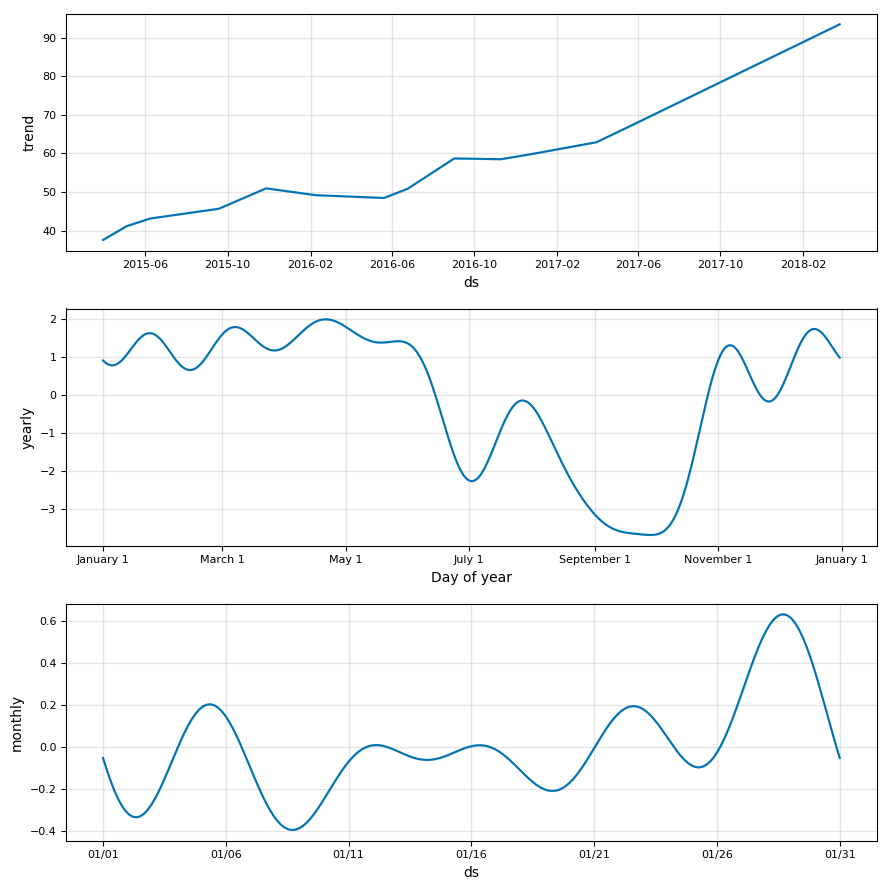

In [33]:
model.plot_components(model_data)
plt.show()

#### 在过去三年里，整体趋势明显是向上的。一年内的趋势似乎是7月、9月和10月有所下降，12月和1月增幅最大。随着时间尺度的减小，模式变得更加复杂。如果认为可能存在有意义的周趋势，可以通过修改Stocker对象上的相关属性来添加周季节性组件。然后重新创建模型并绘制组件。

In [34]:
print(microsoft.weekly_seasonality)
microsoft.weekly_seasonality = True
print(microsoft.weekly_seasonality)

False
True


In [36]:
model, model_data = microsoft.create_prophet_model(days=0)
#model, model_data = microsoft.create_prophet_model()

D:\Downloads\Anaconda\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


OverflowError: Python int too large to convert to C long

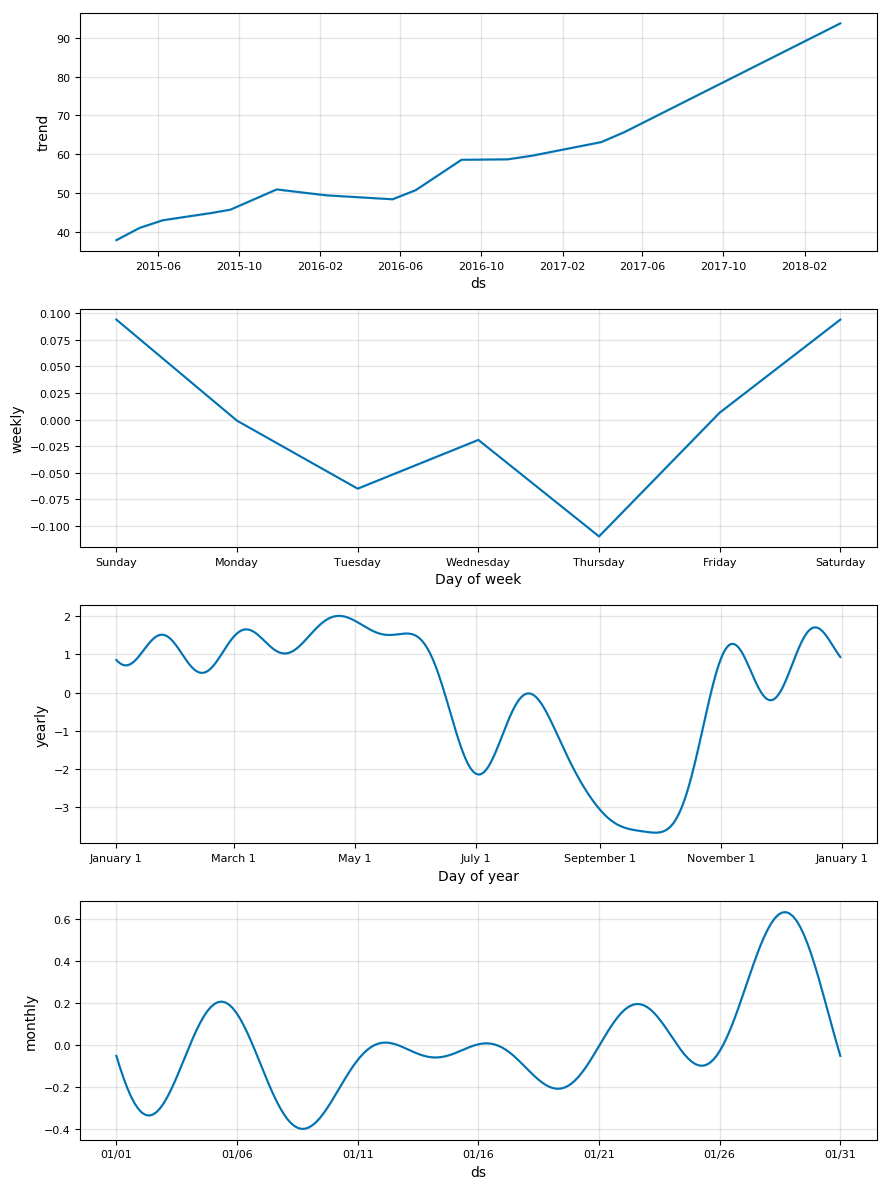

In [37]:
model.plot_components(model_data)
plt.show()

#### 在数据中添加了每周组件。 可以忽略周末，因为交易只发生在一周内（由于市场后交易，价格在一夜之间略有变化，但差异很小，不会影响我们的分析）。 因此，本周没有趋势。 这是可以预期的，因为在足够短的时间尺度上，市场的变动基本上是随机的。 只能看到整体趋势。 即使是每年，也许我们无法辨别出很多模式。 

In [38]:
microsoft.weekly_seasonality=False

#### 时间序列中最重要的概念之一是变更点。 这些发生在二阶导数的最大值处。 如果这没有多大意义，它们是系列从增加到减少或反之亦然，或者当系列从缓慢增加到快速增加时。

In [39]:
microsoft.changepoint_date_analysis()

D:\Downloads\Anaconda\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):



Changepoints sorted by slope rate of change (2nd derivative):

          Date  Adj. Close     delta
361 2016-09-01   55.966886 -1.319902
169 2015-11-27   51.353167 -1.128169
289 2016-05-20   48.886934  0.847661
506 2017-03-31   64.816957  0.580521
120 2015-09-18   41.122995  0.571162


OverflowError: Python int too large to convert to C long

In [41]:
microsoft.changepoint_date_analysis(search = 'Microsoft profit')

D:\Downloads\Anaconda\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


ConnectTimeout: HTTPSConnectionPool(host='trends.google.com', port=443): Max retries exceeded with url: /?geo=US (Caused by ConnectTimeoutError(<urllib3.connection.VerifiedHTTPSConnection object at 0x000001957F8BBC50>, 'Connection to trends.google.com timed out. (connect timeout=2)'))

#### 搜索频率图中的信号看起来比噪声更多，可能存在相关性，但问题是是否存在有意义的原因。 可以使用想要的任何搜索词，并且可能存在各种意外的相关性但只是噪音。

In [42]:
microsoft.changepoint_date_analysis(search = 'Microsoft Office')

D:\Downloads\Anaconda\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


ConnectTimeout: HTTPSConnectionPool(host='trends.google.com', port=443): Max retries exceeded with url: /?geo=US (Caused by ConnectTimeoutError(<urllib3.connection.VerifiedHTTPSConnection object at 0x000001957F86AE80>, 'Connection to trends.google.com timed out. (connect timeout=2)'))

### 预测

In [43]:
model, future = microsoft.create_prophet_model(days=30)

D:\Downloads\Anaconda\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


Predicted Price on 2018-04-26 00:00:00 = $98.17


OverflowError: Python int too large to convert to C long